In [ ]:
!pip install niapy

In [ ]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/tugas_akhir'
file_path = os.path.join(folder_path, 'final_dataset.csv')

try:
    df = pd.read_csv(file_path)
except pd.errors.ParserError:
    df = pd.read_csv(file_path, delimiter=';')

print(df.head())

df = df.drop(columns=['Name'])

print("\njumlah miss value per kolom:")
print(df.isnull().sum())

df.dropna(inplace=True)

Mounted at /content/drive
   Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0  A002           1           1           1           0           0   
1  A014           1           1           1           0           0   
2  A010           1           1           1           0           0   
3  A001           1           1           1           0           0   
4  A005           1           1           1           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP872  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           0  ...             0   

   PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0             0             0          

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Float'])
y = df['Float']

print("\ndistribusi class sebelum split:")
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\ndistribusi class train:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True) * 100)

print("\ndistribusi class test:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True) * 100)


distribusi class sebelum split:
Float
0    55
1    53
Name: count, dtype: int64
Float
0    50.925926
1    49.074074
Name: proportion, dtype: float64

distribusi class train:
Float
0    44
1    42
Name: count, dtype: int64
Float
0    51.162791
1    48.837209
Name: proportion, dtype: float64

distribusi class test:
Float
1    11
0    11
Name: count, dtype: int64
Float
1    50.0
0    50.0
Name: proportion, dtype: float64


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]

print(f"\njumlah fitur sebelum seleksi: {X_train.shape[1]}")
print(f"jumlah fitur setelah Variance Threshold: {X_train_reduced.shape[1]}")
print(f"fitur yang dipilih: {list(selected_features)}")


jumlah fitur sebelum seleksi: 881
jumlah fitur setelah Variance Threshold: 206
fitur yang dipilih: ['PubchemFP12', 'PubchemFP16', 'PubchemFP19', 'PubchemFP20', 'PubchemFP143', 'PubchemFP145', 'PubchemFP146', 'PubchemFP178', 'PubchemFP179', 'PubchemFP180', 'PubchemFP181', 'PubchemFP185', 'PubchemFP186', 'PubchemFP192', 'PubchemFP193', 'PubchemFP255', 'PubchemFP256', 'PubchemFP257', 'PubchemFP333', 'PubchemFP335', 'PubchemFP336', 'PubchemFP338', 'PubchemFP341', 'PubchemFP346', 'PubchemFP355', 'PubchemFP356', 'PubchemFP357', 'PubchemFP358', 'PubchemFP366', 'PubchemFP370', 'PubchemFP371', 'PubchemFP372', 'PubchemFP373', 'PubchemFP374', 'PubchemFP375', 'PubchemFP376', 'PubchemFP378', 'PubchemFP379', 'PubchemFP380', 'PubchemFP381', 'PubchemFP382', 'PubchemFP384', 'PubchemFP385', 'PubchemFP387', 'PubchemFP391', 'PubchemFP392', 'PubchemFP396', 'PubchemFP403', 'PubchemFP405', 'PubchemFP416', 'PubchemFP418', 'PubchemFP419', 'PubchemFP429', 'PubchemFP430', 'PubchemFP431', 'PubchemFP434', 'Pubche

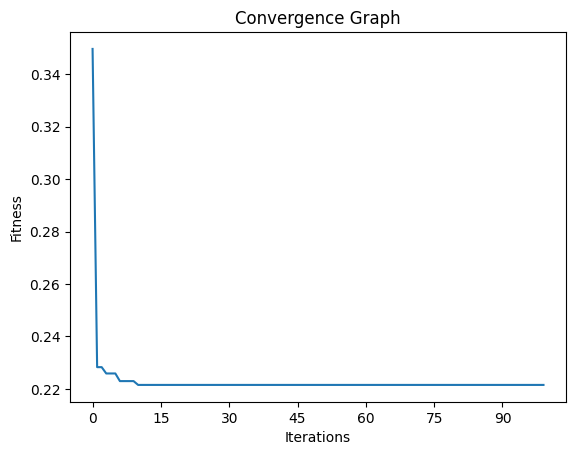


fitur terpilih LOA: 205
['PubchemFP12', 'PubchemFP16', 'PubchemFP19', 'PubchemFP20', 'PubchemFP143', 'PubchemFP145', 'PubchemFP146', 'PubchemFP178', 'PubchemFP179', 'PubchemFP180', 'PubchemFP181', 'PubchemFP185', 'PubchemFP186', 'PubchemFP192', 'PubchemFP193', 'PubchemFP255', 'PubchemFP256', 'PubchemFP257', 'PubchemFP333', 'PubchemFP335', 'PubchemFP336', 'PubchemFP338', 'PubchemFP341', 'PubchemFP346', 'PubchemFP355', 'PubchemFP356', 'PubchemFP357', 'PubchemFP358', 'PubchemFP366', 'PubchemFP370', 'PubchemFP371', 'PubchemFP372', 'PubchemFP373', 'PubchemFP374', 'PubchemFP375', 'PubchemFP376', 'PubchemFP378', 'PubchemFP379', 'PubchemFP380', 'PubchemFP381', 'PubchemFP382', 'PubchemFP384', 'PubchemFP385', 'PubchemFP387', 'PubchemFP391', 'PubchemFP392', 'PubchemFP396', 'PubchemFP403', 'PubchemFP405', 'PubchemFP416', 'PubchemFP418', 'PubchemFP419', 'PubchemFP429', 'PubchemFP430', 'PubchemFP431', 'PubchemFP434', 'PubchemFP435', 'PubchemFP437', 'PubchemFP438', 'PubchemFP440', 'PubchemFP441', 'P

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
from niapy.task import Task
from niapy.problems import Problem
from niapy.algorithms.basic import LionOptimizationAlgorithm
import pickle
import matplotlib.pyplot as plt

class FeatureSelectionProblem (Problem):
    def __init__(self, X, y, alpha=0.7):
        self.X = X
        self.y = y
        self.alpha = alpha
        dim = X.shape[1]
        super().__init__(dimension=dim, lower=0, upper=1)

    def _evaluate(self, solution):
        binary_mask = np.array(solution) > 0.5
        if np.sum(binary_mask) == 0:
            return 1.0

        X_selected = self.X[:, binary_mask]
        model = SVC(kernel='rbf')
        acc = cross_val_score(model, X_selected, self.y, cv=5).mean()
        reduction = 1 - (np.sum(binary_mask) / self.dimension)
        score = self.alpha * (1 - acc) + (1 - self.alpha) * reduction

        return score

X_np = X_train_reduced
y_np = y_train.to_numpy()

problem = FeatureSelectionProblem(X_np, y_np, alpha=0.7)
task = Task(problem=problem, max_iters=100)
algo = LionOptimizationAlgorithm (
    population_size=30,
    nomad_ratio=0.1,
    num_prides=3,
    female_ratio=0.6,
    roaming_factor=0.1,
    mating_factor=0.1,
    mutation_factor=0.05,
    immigration_factor=0.2
    )
best_solution, best_fitness = algo.run(task)
selected_indices = np.where(np.array(best_solution) > 0.5)[0]
selected_features = X_train.columns[selector.get_support()][selected_indices]
task.plot_convergence(x_axis='iters', title='Convergence Graph')

print(f"\nfitur terpilih LOA: {len(selected_features)}")
print(list(selected_features))

X_train_final = X_np[:, selected_indices]
X_test_final = X_test_reduced[:, selected_indices]

loa_results = {
    'best_score': best_fitness,
    'best_solution': best_solution,
    'selected_features': list(selected_features),
    'convergence': task.convergence_data(x_axis='iters')
}

output_path = os.path.join(folder_path, 'loa_rbf.pkl')
with open(output_path, 'wb') as f:
    pickle.dump(loa_results, f)

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import os
import pickle
import time

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.5, 1.0, 2.0]
}

svc = SVC()

def run_grid(X_train, y_train, label):
    print(f"\n=== {label} ===")
    start_time = time.time()

    grid_search = GridSearchCV(
        estimator=svc,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    end_time = time.time()
    duration = end_time - start_time

    results = pd.DataFrame(grid_search.cv_results_)
    results['model_number'] = results.index + 1

    print("\nReport Tuning GridSearchCV:")
    print(results[['model_number', 'params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

    best_idx = grid_search.best_index_
    best_model_number = best_idx + 1
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"\n==> Model terbaik ada di baris ke-{best_model_number} (0-based idx {best_idx})")
    print(results.iloc[best_idx][['model_number', 'params', 'mean_test_score', 'std_test_score']])
    print(f"Waktu eksekusi: {duration:.4f} detik")

    return best_params, best_score, duration

# === Sebelum Seleksi Fitur ===
best_params_before, best_score_before, time_before = run_grid(X_train, y_train, "SEBELUM Seleksi Fitur")

# === Sesudah Seleksi Fitur ===
best_params_after, best_score_after, time_after = run_grid(X_train_final, y_train, "SESUDAH Seleksi Fitur")

output_path = os.path.join(folder_path, 'grid_rbf.pkl')
if os.path.exists(output_path):
    with open(output_path, 'rb') as f:
        all_results = pickle.load(f)
else:
    all_results = {}

all_results['rbf_grid'] = {
    'before': {
        'params': best_params_before,
        'score': best_score_before,
        'time': time_before
    },
    'after': {
        'params': best_params_after,
        'score': best_score_after,
        'time': time_after
    }
}

with open(output_path, 'wb') as f:
    pickle.dump(all_results, f)

print("\n=== Ringkasan Perbandingan GridSearch ===")
print(f"Best Accuracy (Sebelum): {best_score_before:.4f}")
print(f"Best Accuracy (Sesudah): {best_score_after:.4f}")
print(f"Waktu Semua Fitur (detik): {time_before:.4f}")
print(f"Waktu Subset LOA (detik): {time_after:.4f}")



=== SEBELUM Seleksi Fitur ===
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Report Tuning GridSearchCV:
    model_number                                     params  mean_test_score  \
0              1  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.476471   
1              2  {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}         0.511765   
2              3  {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}         0.511765   
3              4  {'C': 0.1, 'gamma': 2.0, 'kernel': 'rbf'}         0.511765   
4              5    {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.720915   
5              6    {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}         0.627451   
6              7    {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}         0.533987   
7              8    {'C': 1, 'gamma': 2.0, 'kernel': 'rbf'}         0.522222   
8              9   {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}         0.684967   
9             10   {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}         0.650980   


Semua Fitur - Default (rbf):
Train Accuracy: 0.7326
Test Accuracy: 0.6364
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.58      1.00      0.73        11

    accuracy                           0.64        22
   macro avg       0.79      0.64      0.58        22
weighted avg       0.79      0.64      0.58        22

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.48      0.65        44
           1       0.65      1.00      0.79        42

    accuracy                           0.73        86
   macro avg       0.82      0.74      0.72        86
weighted avg       0.83      0.73      0.71        86


Seleksi LOA - Default (rbf):
Train Accuracy: 0.7791
Test Accuracy: 0.6818
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.45      0.59       

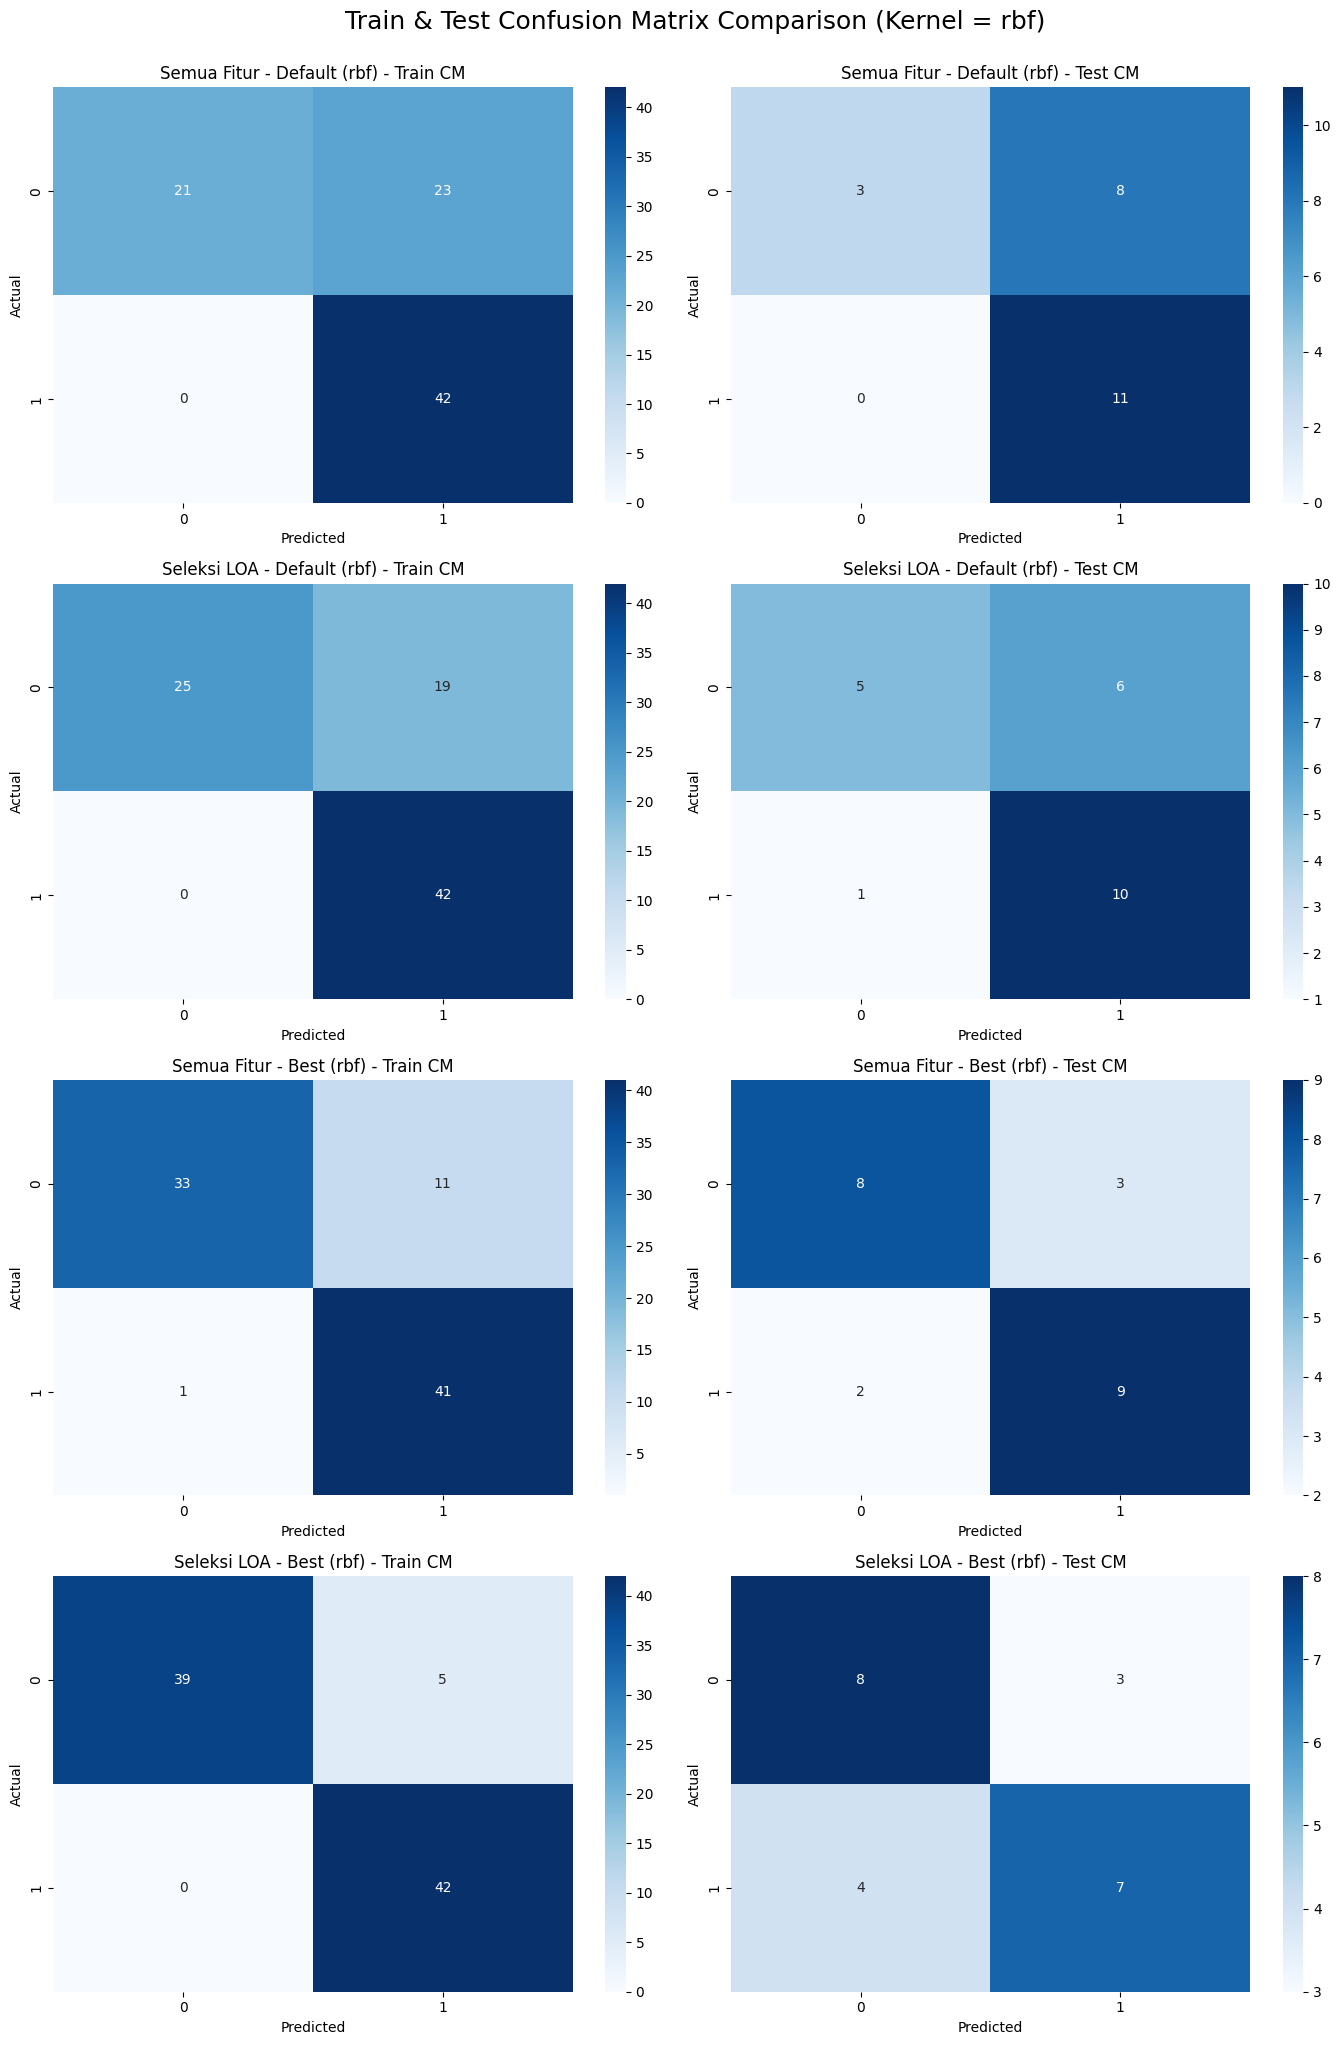

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix(cm, title, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

chosen_kernel = 'rbf'

scenarios = [
    (f"Semua Fitur - Default ({chosen_kernel})", SVC(kernel=chosen_kernel), X_train, X_test),
    (f"Seleksi LOA - Default ({chosen_kernel})", SVC(kernel=chosen_kernel), X_train_final, X_test_final),
    (f"Semua Fitur - Best ({chosen_kernel})", SVC(**best_params_before), X_train, X_test),
    (f"Seleksi LOA - Best ({chosen_kernel})", SVC(**best_params_after), X_train_final, X_test_final)
]

fig, axs = plt.subplots(4, 2, figsize=(14, 20))

for i, (label, model, Xtr, Xte) in enumerate(scenarios):
    model.fit(Xtr, y_train)
    y_pred_train = model.predict(Xtr)
    y_pred_test = model.predict(Xte)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"\n{label}:")
    print(f"Train Accuracy: {acc_train:.4f}")
    print(f"Test Accuracy: {acc_test:.4f}")
    print("Classification Report (Test):")
    print(classification_report(y_test, y_pred_test))
    print("Classification Report (Train):")
    print(classification_report(y_train, y_pred_train))

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    plot_conf_matrix(cm_train, f"{label} - Train CM", axs[i, 0])
    plot_conf_matrix(cm_test, f"{label} - Test CM", axs[i, 1])

plt.tight_layout()
plt.suptitle(f"Train & Test Confusion Matrix Comparison (Kernel = {chosen_kernel})", fontsize=18, y=1.02)
plt.show()
